In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("bikes.csv")
df

,date,temperature,humidity,windspeed,count
0,2011-01-03,2.716070,45.715346,21.414957,120.000000
1,2011-01-04,2.896673,54.267219,15.136882,108.000000
2,2011-01-05,4.235654,45.697702,17.034578,82.000000
3,2011-01-06,3.112643,50.237349,10.091568,88.000000
4,2011-01-07,2.723918,49.144928,15.738204,148.000000
5,2011-01-08,1.967445,48.851252,17.035029,112.333333
6,2011-01-09,1.210973,48.557576,18.331855,76.666667
7,2011-01-10,0.454501,48.263900,19.628680,41.000000
8,2011-01-11,1.361393,59.623460,12.414597,43.000000
9,2011-01-12,1.541997,54.775880,25.432188,25.000000


In [3]:
df.keys()

Index(['date', 'temperature', 'humidity', 'windspeed', 'count'], dtype='object')

In [4]:
df.shape

(191, 5)

In [5]:
df.dtypes

date            object
temperature    float64
humidity       float64
windspeed      float64
count          float64
dtype: object

In [6]:
df.isnull().sum()

date           0
temperature    0
humidity       0
windspeed      0
count          0
dtype: int64

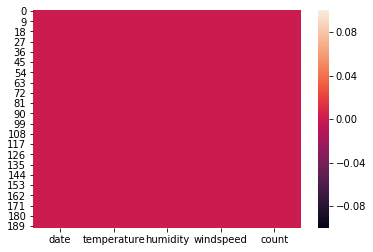

In [7]:
sns.heatmap(df.isnull())

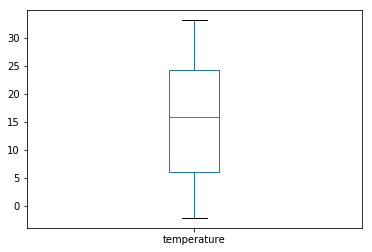

In [8]:
df['temperature'].plot.box()

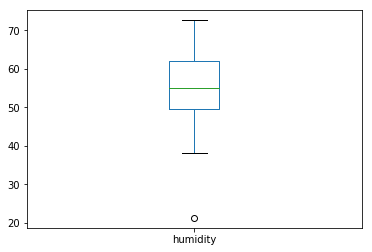

In [10]:
df['humidity'].plot.box()

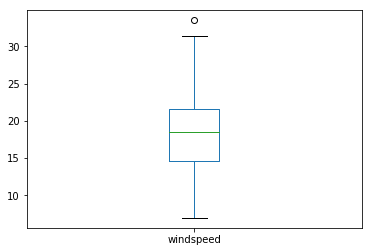

In [11]:
df['windspeed'].plot.box()

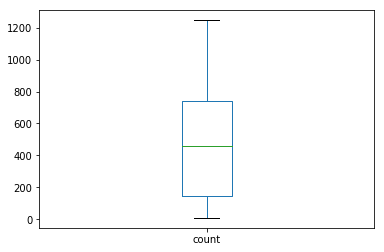

In [12]:
df['count'].plot.box()

In [13]:
df.describe

<bound method NDFrame.describe of            date  temperature   humidity  windspeed        count
0    2011-01-03     2.716070  45.715346  21.414957   120.000000
1    2011-01-04     2.896673  54.267219  15.136882   108.000000
2    2011-01-05     4.235654  45.697702  17.034578    82.000000
3    2011-01-06     3.112643  50.237349  10.091568    88.000000
4    2011-01-07     2.723918  49.144928  15.738204   148.000000
5    2011-01-08     1.967445  48.851252  17.035029   112.333333
6    2011-01-09     1.210973  48.557576  18.331855    76.666667
7    2011-01-10     0.454501  48.263900  19.628680    41.000000
8    2011-01-11     1.361393  59.623460  12.414597    43.000000
9    2011-01-12     1.541997  54.775880  25.432188    25.000000
10   2011-01-13     1.158189  47.565957  25.173470    38.000000
11   2011-01-14     0.953048  51.329770  12.729596    54.000000
12   2011-01-15     1.645921  55.850225  13.090300    42.750000
13   2011-01-16     2.338794  60.370679  13.451004    31.500000
14   2

temperature       AxesSubplot(0.125,0.536818;0.0731132x0.343182)
humidity       AxesSubplot(0.212736,0.536818;0.0731132x0.343182)
windspeed      AxesSubplot(0.300472,0.536818;0.0731132x0.343182)
count          AxesSubplot(0.388208,0.536818;0.0731132x0.343182)
dtype: object

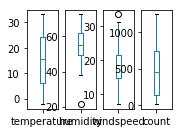

In [14]:
df.plot(kind='box',subplots=True,layout=(2,9))

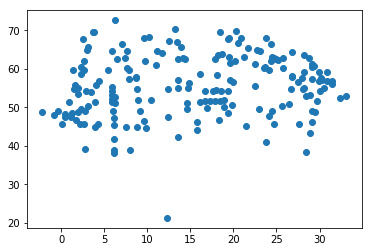

In [15]:
plt.scatter(df['temperature'],df['humidity'])
plt.show()

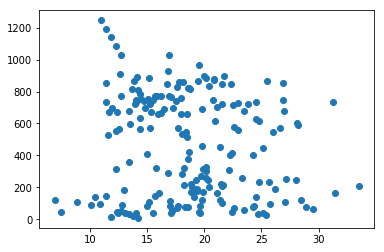

In [16]:
plt.scatter(df['windspeed'],df['count'])
plt.show()

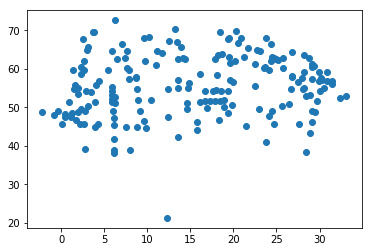

In [17]:
x=df['temperature']
y=df['humidity']
plt.scatter(x,y)
plt.show()

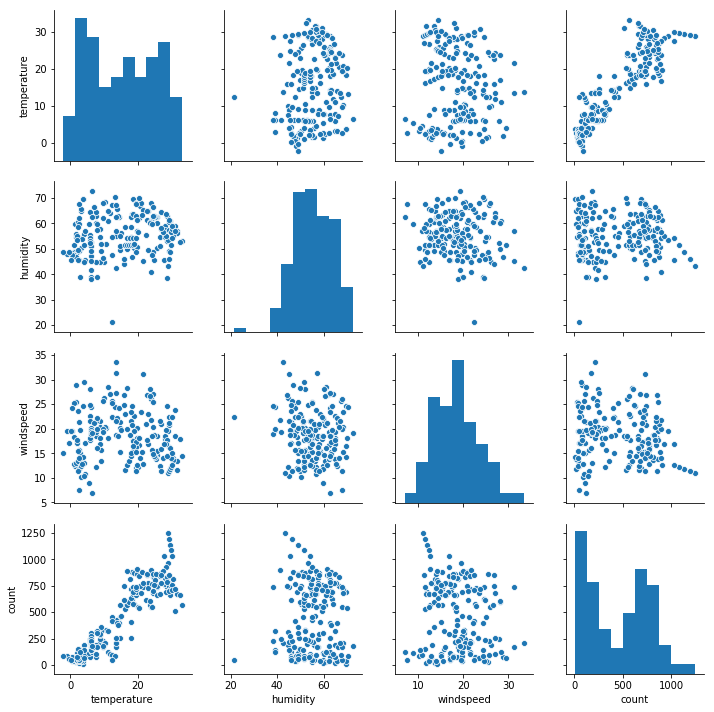

In [18]:
sns.pairplot(df)

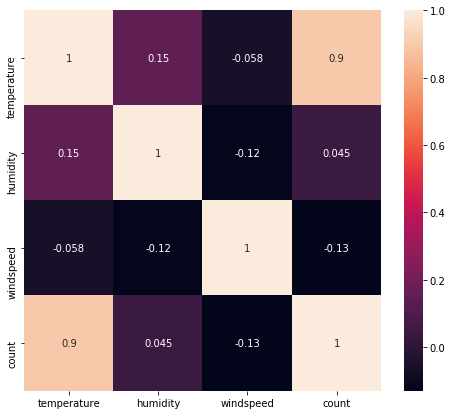

In [19]:
corr_hmap=df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [46]:
df.shape

(191, 5)

In [52]:
df1=df.drop(['date'],axis=1)
df1

,temperature,humidity,windspeed,count
0,2.716070,45.715346,21.414957,120.000000
1,2.896673,54.267219,15.136882,108.000000
2,4.235654,45.697702,17.034578,82.000000
3,3.112643,50.237349,10.091568,88.000000
4,2.723918,49.144928,15.738204,148.000000
5,1.967445,48.851252,17.035029,112.333333
6,1.210973,48.557576,18.331855,76.666667
7,0.454501,48.263900,19.628680,41.000000
8,1.361393,59.623460,12.414597,43.000000
9,1.541997,54.775880,25.432188,25.000000


In [53]:
df1=df.drop(['date'],axis=1,inplace=True)
df1

In [55]:
x=df.iloc[:,0:-1]
x.head()

,temperature,humidity,windspeed
0,2.716070,45.715346,21.414957
1,2.896673,54.267219,15.136882
2,4.235654,45.697702,17.034578
3,3.112643,50.237349,10.091568
4,2.723918,49.144928,15.738204


In [56]:
y=df.iloc[:,-1]
y.head()

0    120.0
1    108.0
2     82.0
3     88.0
4    148.0
Name: count, dtype: float64

In [57]:
x.shape

(191, 3)

In [58]:
y.shape

(191,)

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=49)

In [83]:
x_train.shape

(127, 3)

In [84]:
y_train.shape

(127,)

In [85]:
x_test.shape

(64, 3)

In [86]:
y_test.shape

(64,)

In [87]:
lm=LinearRegression()

In [88]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [89]:
lm.score(x_train,y_train) #84% it is working well

0.8456920973932686

In [90]:
pred=lm.predict(x_test)
print("Actual Bike rented on particular date :",y_test)
print("Pred Number of total bikes rented on particular date:",pred)

Actual Bike rented on particular date : 70      359.000000
111     574.333333
116     878.000000
90      591.666667
128     550.000000
117     867.666667
74      884.000000
7        41.000000
123     894.000000
83      248.000000
55       94.000000
183    1031.000000
69      321.666667
29       47.000000
181    1138.500000
186     692.000000
67      247.000000
147     722.500000
157     563.000000
17       83.000000
158     815.000000
118     857.333333
21       86.000000
172     969.000000
38       47.000000
23       34.000000
6        76.666667
53      120.000000
107     613.000000
2        82.000000
          ...     
46      579.000000
68      284.333333
179    1246.000000
18       75.000000
48      326.500000
121     255.000000
155     763.000000
76      562.000000
26       39.333333
45      259.000000
84      222.000000
122     614.000000
15        9.000000
97      627.333333
130     692.000000
129     695.000000
89      449.333333
149     513.000000
189     723.000000
152     82

In [91]:
df=pd.DataFrame({'Actual Bike rented on particular date':y_test,'Pred Number of total bikes rented on particular date':pred})
df

,Actual Bike rented on particular date,Pred Number of total bikes rented on particular date
70,359.000000,314.459449
111,574.333333,530.605516
116,878.000000,558.956808
90,591.666667,477.431146
128,550.000000,613.189093
117,867.666667,568.396008
74,884.000000,593.944433
7,41.000000,36.212839
123,894.000000,495.178545
83,248.000000,222.756897
